In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

In [3]:
df.head(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
#fill the null values with mean
df['horsepower'].fillna(df['horsepower'].mean(),inplace = True)

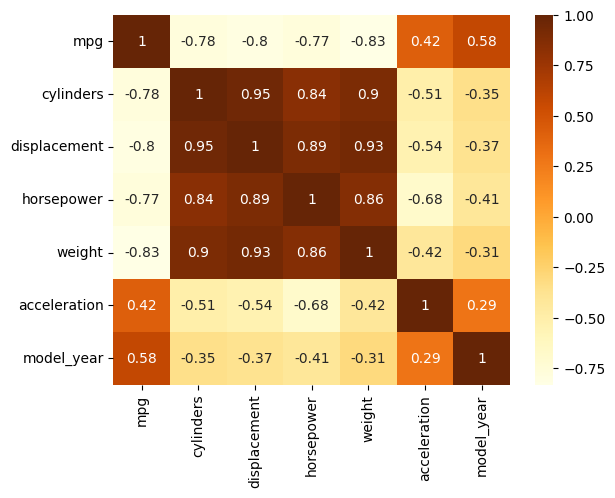

In [8]:
numeric_columns = df.select_dtypes(include= ['number'])
sns.heatmap(numeric_columns.corr(),cmap = 'YlOrBr', annot =True)
plt.show()

In [9]:
df.value_counts().sum()

398

In [10]:
df['mpg'].value_counts()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64

In [11]:
df = df.rename(columns = {'mpg':'miles per gallon'})

In [12]:
top10_car_name=df['name'].value_counts().reset_index().head(10)
top10_car_name

,name,count
0,ford pinto,6
1,toyota corolla,5
2,amc matador,5
3,ford maverick,5
4,chevrolet chevette,4
5,amc gremlin,4
6,chevrolet impala,4
7,peugeot 504,4
8,amc hornet,4
9,toyota corona,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ford pinto'),
  Text(1, 0, 'toyota corolla'),
  Text(2, 0, 'amc matador'),
  Text(3, 0, 'ford maverick'),
  Text(4, 0, 'chevrolet chevette'),
  Text(5, 0, 'amc gremlin'),
  Text(6, 0, 'chevrolet impala'),
  Text(7, 0, 'peugeot 504'),
  Text(8, 0, 'amc hornet'),
  Text(9, 0, 'toyota corona')])

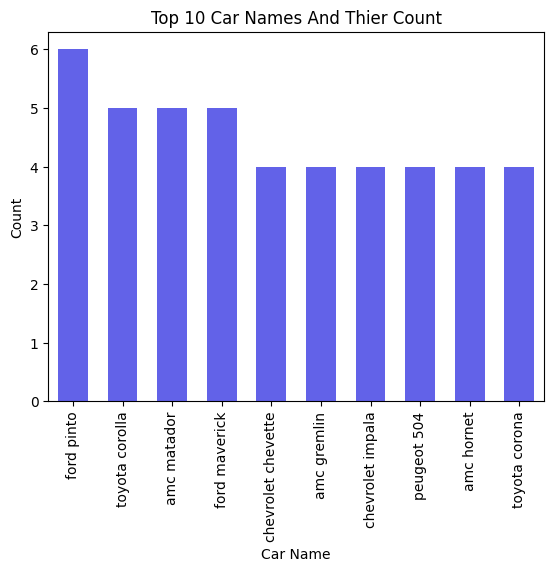

In [13]:
sns.barplot(data=top10_car_name, x='name',y='count',alpha=0.7,width=0.6,color='blue')
plt.ylabel('Count')
plt.xlabel('Car Name')
plt.title('Top 10 Car Names And Thier Count')
plt.xticks(rotation = 90)

In [14]:
top10_car_horsepower=df['horsepower'].value_counts().reset_index().head(10)
top10_car_horsepower

,horsepower,count
0,150.0,22
1,90.0,20
2,88.0,19
3,110.0,18
4,100.0,17
5,75.0,14
6,95.0,14
7,105.0,12
8,70.0,12
9,67.0,12


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '67.0'),
  Text(1, 0, '70.0'),
  Text(2, 0, '75.0'),
  Text(3, 0, '88.0'),
  Text(4, 0, '90.0'),
  Text(5, 0, '95.0'),
  Text(6, 0, '100.0'),
  Text(7, 0, '105.0'),
  Text(8, 0, '110.0'),
  Text(9, 0, '150.0')])

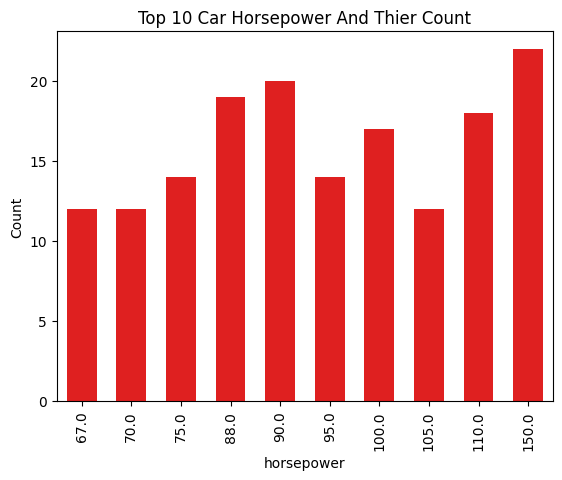

In [15]:
sns.barplot(data = top10_car_horsepower, x='horsepower', y= 'count',alpha =1 , width =0.6 , color ='red')
plt.ylabel('Count')
plt.xlabel('horsepower')
plt.title('Top 10 Car Horsepower And Thier Count')
plt.xticks(rotation = 90)

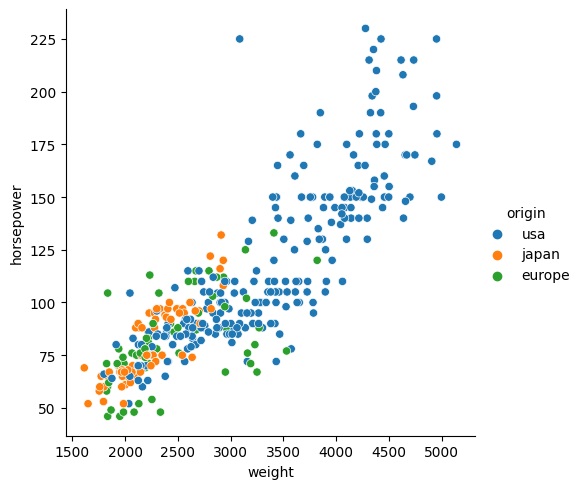

In [16]:
sns.relplot(data=df, x='weight', y='horsepower', hue='origin')

<Axes: ylabel='count'>

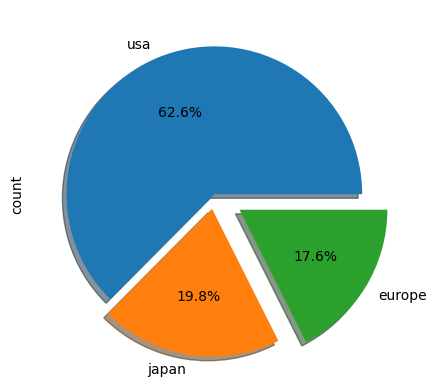

In [17]:
df.origin.value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.1, 0.2], shadow=True)

In [18]:
df.to_csv('Car_Info_Data.csv')